In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

from keras.models import Sequential
from keras.layers import Input, LSTM, Dense, Dropout, Conv1D, MaxPooling1D, BatchNormalization, Attention, Flatten, Bidirectional
from tensorflow.keras.models import Model
from keras.optimizers import Adam
from keras.losses import MeanSquaredError
from keras.metrics import RootMeanSquaredError
from keras.constraints import MaxNorm
from keras.callbacks import ModelCheckpoint

import time

In [55]:
filepath = 'C:/Users/ss230/Documents/Study/NSIDC/Edited Data/N_Sea_Ice_Index_Regional_Monthly_Data_G02135_v3.0.xlsx'
Baffin = pd.read_excel(filepath, sheet_name='Baffin-Extent-km^2')

In [56]:
import sys
sys.path.append('C:/Users/ss230/Documents/Study/NSIDC/NH/')
import Function as fp

In [57]:
fp.month_mapping(Baffin)
fp.date_time(Baffin)

,Extent,Date
0,1090625.815,1979-01-01
1,1157634.866,1979-02-01
2,1299583.477,1979-03-01
3,1137194.680,1979-04-01
4,983083.453,1979-05-01
...,...,...
533,781460.891,2023-06-01
534,331845.048,2023-07-01
535,99334.625,2023-08-01
536,49359.723,2023-09-01


In [58]:
scaler = MinMaxScaler()
Baffin['Extent'] = scaler.fit_transform(Baffin['Extent'].values.reshape(-1, 1))

In [59]:
extent = Baffin['Extent']
W_S=12
X,y = fp.df_to_X_y(extent, W_S)
X.shape, y.shape

((526, 12, 1), (526,))

In [60]:
X_train, y_train = X[:420], y[:420]
X_val, y_val = X[420:472], y[420:472]
X_test, y_test = X[472:], y[472:]

In [61]:
input_shape = (X_train.shape[1], X_train.shape[2])
input_layer = Input(shape=input_shape)

conv_layer = Conv1D(filters=64, kernel_size=3, activation='relu')(input_layer)
maxpool_layer = MaxPooling1D(pool_size=2)(conv_layer)

lstm_layer1 = Bidirectional(LSTM(units=64, kernel_constraint=MaxNorm(1.0), activation='relu', return_sequences=True))(maxpool_layer)
attention_layer = Attention()([lstm_layer1, lstm_layer1])
lstm_layer2 = Bidirectional(LSTM(units=32, kernel_constraint=MaxNorm(1.0), activation='relu'))(attention_layer)

bn = BatchNormalization()(lstm_layer2)

output_layer = Dense(units=1, activation='linear')(bn)
model = Model(inputs=input_layer, outputs=output_layer)

In [62]:
cp = ModelCheckpoint('Baffin_model/', save_best_only=True)
model.compile(loss=MeanSquaredError(), optimizer=Adam(0.0001), metrics=[RootMeanSquaredError()])

In [63]:
stime = time.time()
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=8, callbacks=[cp])
etime = time.time()

Epoch 1/50
51/53 [===========================>..] - ETA: 0s - loss: 0.2076 - root_mean_squared_error: 0.4556

INFO:tensorflow:Assets written to: Baffin_model\assets


INFO:tensorflow:Assets written to: Baffin_model\assets


53/53 [==============================] - 18s 227ms/step - loss: 0.2054 - root_mean_squared_error: 0.4532 - val_loss: 0.2145 - val_root_mean_squared_error: 0.4632
Epoch 2/50
52/53 [============================>.] - ETA: 0s - loss: 0.1419 - root_mean_squared_error: 0.3768

INFO:tensorflow:Assets written to: Baffin_model\assets


INFO:tensorflow:Assets written to: Baffin_model\assets


53/53 [==============================] - 12s 222ms/step - loss: 0.1421 - root_mean_squared_error: 0.3770 - val_loss: 0.1638 - val_root_mean_squared_error: 0.4048
Epoch 3/50
53/53 [==============================] - ETA: 0s - loss: 0.0992 - root_mean_squared_error: 0.3150

INFO:tensorflow:Assets written to: Baffin_model\assets


INFO:tensorflow:Assets written to: Baffin_model\assets


53/53 [==============================] - 12s 239ms/step - loss: 0.0992 - root_mean_squared_error: 0.3150 - val_loss: 0.1271 - val_root_mean_squared_error: 0.3565
Epoch 4/50
50/53 [===========================>..] - ETA: 0s - loss: 0.0728 - root_mean_squared_error: 0.2699

INFO:tensorflow:Assets written to: Baffin_model\assets


INFO:tensorflow:Assets written to: Baffin_model\assets


53/53 [==============================] - 11s 212ms/step - loss: 0.0721 - root_mean_squared_error: 0.2685 - val_loss: 0.1022 - val_root_mean_squared_error: 0.3197
Epoch 5/50
52/53 [============================>.] - ETA: 0s - loss: 0.0505 - root_mean_squared_error: 0.2246

INFO:tensorflow:Assets written to: Baffin_model\assets


INFO:tensorflow:Assets written to: Baffin_model\assets


53/53 [==============================] - 12s 236ms/step - loss: 0.0504 - root_mean_squared_error: 0.2245 - val_loss: 0.0822 - val_root_mean_squared_error: 0.2867
Epoch 6/50
53/53 [==============================] - ETA: 0s - loss: 0.0327 - root_mean_squared_error: 0.1808

INFO:tensorflow:Assets written to: Baffin_model\assets


INFO:tensorflow:Assets written to: Baffin_model\assets


53/53 [==============================] - 12s 240ms/step - loss: 0.0327 - root_mean_squared_error: 0.1808 - val_loss: 0.0677 - val_root_mean_squared_error: 0.2602
Epoch 7/50
51/53 [===========================>..] - ETA: 0s - loss: 0.0265 - root_mean_squared_error: 0.1628

INFO:tensorflow:Assets written to: Baffin_model\assets


INFO:tensorflow:Assets written to: Baffin_model\assets


53/53 [==============================] - 11s 212ms/step - loss: 0.0259 - root_mean_squared_error: 0.1610 - val_loss: 0.0544 - val_root_mean_squared_error: 0.2333
Epoch 8/50
51/53 [===========================>..] - ETA: 0s - loss: 0.0199 - root_mean_squared_error: 0.1411

INFO:tensorflow:Assets written to: Baffin_model\assets


INFO:tensorflow:Assets written to: Baffin_model\assets


53/53 [==============================] - 12s 229ms/step - loss: 0.0195 - root_mean_squared_error: 0.1397 - val_loss: 0.0446 - val_root_mean_squared_error: 0.2113
Epoch 9/50
52/53 [============================>.] - ETA: 0s - loss: 0.0127 - root_mean_squared_error: 0.1126

INFO:tensorflow:Assets written to: Baffin_model\assets


INFO:tensorflow:Assets written to: Baffin_model\assets


53/53 [==============================] - 12s 227ms/step - loss: 0.0133 - root_mean_squared_error: 0.1153 - val_loss: 0.0353 - val_root_mean_squared_error: 0.1879
Epoch 10/50
51/53 [===========================>..] - ETA: 0s - loss: 0.0132 - root_mean_squared_error: 0.1148

INFO:tensorflow:Assets written to: Baffin_model\assets


INFO:tensorflow:Assets written to: Baffin_model\assets


53/53 [==============================] - 11s 209ms/step - loss: 0.0132 - root_mean_squared_error: 0.1149 - val_loss: 0.0262 - val_root_mean_squared_error: 0.1620
Epoch 11/50
51/53 [===========================>..] - ETA: 0s - loss: 0.0124 - root_mean_squared_error: 0.1113

INFO:tensorflow:Assets written to: Baffin_model\assets


INFO:tensorflow:Assets written to: Baffin_model\assets


53/53 [==============================] - 12s 240ms/step - loss: 0.0125 - root_mean_squared_error: 0.1118 - val_loss: 0.0184 - val_root_mean_squared_error: 0.1355
Epoch 12/50
50/53 [===========================>..] - ETA: 0s - loss: 0.0102 - root_mean_squared_error: 0.1011

INFO:tensorflow:Assets written to: Baffin_model\assets


INFO:tensorflow:Assets written to: Baffin_model\assets


53/53 [==============================] - 11s 211ms/step - loss: 0.0102 - root_mean_squared_error: 0.1010 - val_loss: 0.0140 - val_root_mean_squared_error: 0.1184
Epoch 13/50
53/53 [==============================] - ETA: 0s - loss: 0.0098 - root_mean_squared_error: 0.0988

INFO:tensorflow:Assets written to: Baffin_model\assets


INFO:tensorflow:Assets written to: Baffin_model\assets


53/53 [==============================] - 12s 227ms/step - loss: 0.0098 - root_mean_squared_error: 0.0988 - val_loss: 0.0070 - val_root_mean_squared_error: 0.0835
Epoch 14/50
52/53 [============================>.] - ETA: 0s - loss: 0.0101 - root_mean_squared_error: 0.1006

INFO:tensorflow:Assets written to: Baffin_model\assets


INFO:tensorflow:Assets written to: Baffin_model\assets


53/53 [==============================] - 12s 233ms/step - loss: 0.0113 - root_mean_squared_error: 0.1063 - val_loss: 0.0048 - val_root_mean_squared_error: 0.0691
Epoch 15/50
51/53 [===========================>..] - ETA: 0s - loss: 0.0115 - root_mean_squared_error: 0.1074

INFO:tensorflow:Assets written to: Baffin_model\assets


INFO:tensorflow:Assets written to: Baffin_model\assets


53/53 [==============================] - 11s 216ms/step - loss: 0.0113 - root_mean_squared_error: 0.1063 - val_loss: 0.0028 - val_root_mean_squared_error: 0.0530
Epoch 16/50
53/53 [==============================] - 1s 19ms/step - loss: 0.0115 - root_mean_squared_error: 0.1071 - val_loss: 0.0054 - val_root_mean_squared_error: 0.0737
Epoch 17/50
53/53 [==============================] - 1s 15ms/step - loss: 0.0141 - root_mean_squared_error: 0.1188 - val_loss: 0.0056 - val_root_mean_squared_error: 0.0750
Epoch 18/50
52/53 [============================>.] - ETA: 0s - loss: 0.0134 - root_mean_squared_error: 0.1157

INFO:tensorflow:Assets written to: Baffin_model\assets


INFO:tensorflow:Assets written to: Baffin_model\assets


53/53 [==============================] - 13s 242ms/step - loss: 0.0134 - root_mean_squared_error: 0.1159 - val_loss: 0.0020 - val_root_mean_squared_error: 0.0448
Epoch 19/50
53/53 [==============================] - 1s 19ms/step - loss: 0.0100 - root_mean_squared_error: 0.1001 - val_loss: 0.0024 - val_root_mean_squared_error: 0.0495
Epoch 20/50
53/53 [==============================] - 1s 16ms/step - loss: 0.0110 - root_mean_squared_error: 0.1048 - val_loss: 0.0024 - val_root_mean_squared_error: 0.0491
Epoch 21/50
53/53 [==============================] - 1s 18ms/step - loss: 0.0117 - root_mean_squared_error: 0.1081 - val_loss: 0.0049 - val_root_mean_squared_error: 0.0701
Epoch 22/50
53/53 [==============================] - 1s 20ms/step - loss: 0.0133 - root_mean_squared_error: 0.1155 - val_loss: 0.0066 - val_root_mean_squared_error: 0.0813
Epoch 23/50
53/53 [==============================] - 1s 19ms/step - loss: 0.0108 - root_mean_squared_error: 0.1037 - val_loss: 0.0023 - val_root_mean_

INFO:tensorflow:Assets written to: Baffin_model\assets


INFO:tensorflow:Assets written to: Baffin_model\assets


53/53 [==============================] - 13s 241ms/step - loss: 0.0088 - root_mean_squared_error: 0.0937 - val_loss: 0.0019 - val_root_mean_squared_error: 0.0440
Epoch 49/50
53/53 [==============================] - 1s 18ms/step - loss: 0.0141 - root_mean_squared_error: 0.1188 - val_loss: 0.0041 - val_root_mean_squared_error: 0.0643
Epoch 50/50
53/53 [==============================] - 1s 16ms/step - loss: 0.0132 - root_mean_squared_error: 0.1150 - val_loss: 0.0030 - val_root_mean_squared_error: 0.0545


In [64]:
time = (etime - stime)/60
print(f'{time} minutes')

4.0332894643147785 minutes


In [65]:
loss = history.history['loss']
epochs = list(range(1, len(loss) + 1))

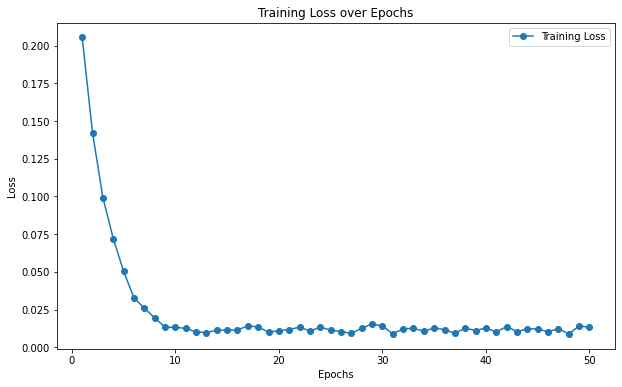

In [66]:
plt.figure(figsize=(10, 6))
plt.plot(epochs, loss, label='Training Loss', marker='o', linestyle='-')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.show()

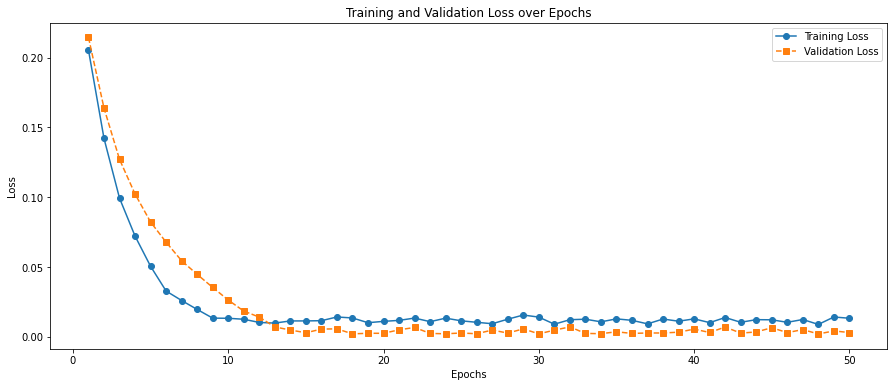

In [67]:
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
epochs = range(1, len(training_loss) + 1)

plt.figure(figsize=(15,6))
plt.plot(epochs, training_loss, label='Training Loss', marker='o', linestyle='-')
plt.plot(epochs, validation_loss, label='Validation Loss', marker='s', linestyle='--')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.show()

Test Predictions

In [68]:
from tensorflow.keras.models import load_model
model1 = load_model('Baffin_model/')

In [69]:
test_predictions = model1.predict(X_test)

2/2 [==============================] - 1s 13ms/step


In [70]:
mse = mean_squared_error(y_test, test_predictions)
print('RMSE :', np.sqrt(mse))

RMSE : 0.04366663500453617


In [71]:
mae = mean_absolute_error(y_test, test_predictions)
print('MAE :', mae)

MAE : 0.033329696539517645


In [72]:
test_predictions = scaler.inverse_transform(test_predictions)
test_original = scaler.inverse_transform(y_test.reshape(-1,1))

In [73]:
train_results = pd.DataFrame(data={'Train Predictions': test_predictions.flatten(), 'Actual Extent': test_original.flatten()})
train_results

,Train Predictions,Actual Extent
0,1.000404e+06,936648.998
1,6.939691e+05,587385.424
2,2.889816e+05,171258.094
3,4.111814e+04,46930.952
4,3.929388e+04,27600.624
5,2.470294e+05,61057.940
6,4.236389e+05,291275.949
7,6.555904e+05,678576.504
8,9.172336e+05,974461.347
9,1.155137e+06,1181121.087


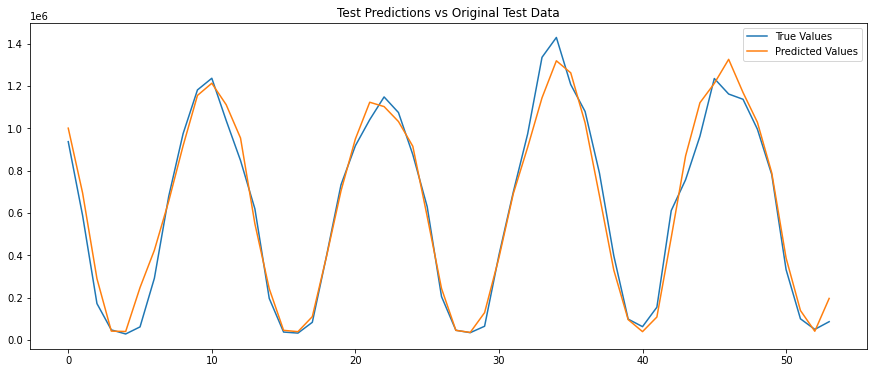

In [74]:
plt.figure(figsize=(15,6))
plt.plot(test_original, label='True Values')
plt.plot(test_predictions, label='Predicted Values')
plt.title('Test Predictions vs Original Test Data')
plt.legend()
plt.show()

Prediction on whole dataset

In [75]:
predictions = model1.predict(X)

17/17 [==============================] - 0s 9ms/step


In [76]:
mse = mean_squared_error(y, predictions)
print(mse)

0.0017192400682491215


In [77]:
mae = mean_absolute_error(y, predictions)
print(mae)

0.032541159266181355


In [78]:
predictions = scaler.inverse_transform(predictions)
Original = scaler.inverse_transform(y.reshape(-1,1))

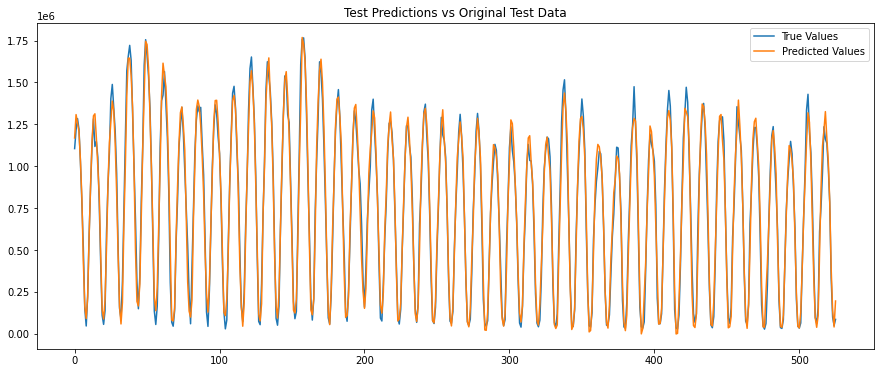

In [79]:
plt.figure(figsize=(15,6))
plt.plot(Original, label='True Values')
plt.plot(predictions, label='Predicted Values')
plt.title('Test Predictions vs Original Test Data')
plt.legend()
plt.show()